In [1]:
%matplotlib inline
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy.misc import toimage

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np

Using TensorFlow backend.


# Preprocessing data

In [2]:
data = pd.read_csv('CIFAR_10_dataset.csv')

In [3]:
data.head()

,label,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,Pixel 10,Pixel 11,Pixel 12,Pixel 13,Pixel 14,Pixel 15,Pixel 16,Pixel 17,Pixel 18,Pixel 19,Pixel 20,Pixel 21,Pixel 22,Pixel 23,Pixel 24,Pixel 25,Pixel 26,Pixel 27,Pixel 28,Pixel 29,Pixel 30,Pixel 31,Pixel 32,Pixel 33,Pixel 34,Pixel 35,Pixel 36,Pixel 37,Pixel 38,Pixel 39,Pixel 40,Pixel 41,Pixel 42,Pixel 43,Pixel 44,Pixel 45,Pixel 46,Pixel 47,Pixel 48,Pixel 49,Pixel 50,Pixel 51,Pixel 52,Pixel 53,Pixel 54,Pixel 55,Pixel 56,Pixel 57,Pixel 58,Pixel 59,Pixel 60,Pixel 61,Pixel 62,Pixel 63,Pixel 64,Pixel 65,Pixel 66,Pixel 67,Pixel 68,Pixel 69,Pixel 70,Pixel 71,Pixel 72,Pixel 73,Pixel 74,Pixel 75,Pixel 76,Pixel 77,Pixel 78,Pixel 79,Pixel 80,Pixel 81,Pixel 82,Pixel 83,Pixel 84,Pixel 85,Pixel 86,...,Pixel 2986,Pixel 2987,Pixel 2988,Pixel 2989,Pixel 2990,Pixel 2991,Pixel 2992,Pixel 2993,Pixel 2994,Pixel 2995,Pixel 2996,Pixel 2997,Pixel 2998,Pixel 2999,Pixel 3000,Pixel 3001,Pixel 3002,Pixel 3003,Pixel 3004,Pixel 3005,Pixel 3006,Pixel 3007,Pixel 3008,Pixel 3009,Pixel 3010,Pixel 3011,Pixel 3012,Pixel 3013,Pixel 3014,Pixel 3015,Pixel 3016,Pixel 3017,Pixel 3018,Pixel 3019,Pixel 3020,Pixel 3021,Pixel 3022,Pixel 3023,Pixel 3024,Pixel 3025,Pixel 3026,Pixel 3027,Pixel 3028,Pixel 3029,Pixel 3030,Pixel 3031,Pixel 3032,Pixel 3033,Pixel 3034,Pixel 3035,Pixel 3036,Pixel 3037,Pixel 3038,Pixel 3039,Pixel 3040,Pixel 3041,Pixel 3042,Pixel 3043,Pixel 3044,Pixel 3045,Pixel 3046,Pixel 3047,Pixel 3048,Pixel 3049,Pixel 3050,Pixel 3051,Pixel 3052,Pixel 3053,Pixel 3054,Pixel 3055,Pixel 3056,Pixel 3057,Pixel 3058,Pixel 3059,Pixel 3060,Pixel 3061,Pixel 3062,Pixel 3063,Pixel 3064,Pixel 3065,Pixel 3066,Pixel 3067,Pixel 3068,Pixel 3069,Pixel 3070,Pixel 3071,Pixel 3072
0,frog,59,43,50,68,98,119,139,145,149,149,131,125,142,144,137,129,137,134,124,139,139,133,136,139,152,163,168,159,158,158,152,148,16,0,18,51,88,120,128,127,126,116,106,101,105,113,109,112,119,109,105,125,127,122,131,124,121,131,132,133,133,123,119,122,25,16,49,83,110,129,130,121,113,112,112,106,105,128,124,130,127,122,115,120,130,131,...,46,57,62,55,57,51,52,54,58,60,61,64,46,33,39,58,62,40,11,60,70,7,20,96,42,30,25,34,36,32,32,38,38,49,56,52,52,51,53,58,60,60,56,43,33,38,29,39,30,11,0,57,94,34,34,116,94,87,67,68,76,72,70,79,82,86,92,94,92,84,90,93,91,83,77,69,55,59,58,65,59,46,57,104,140,84,72
1,truck,154,126,105,102,125,155,172,180,142,111,106,109,123,127,181,217,209,166,164,158,116,102,95,90,72,60,56,77,94,91,87,79,140,145,125,124,150,152,174,178,134,110,133,163,192,218,240,245,241,238,234,226,142,96,99,95,89,80,65,84,92,96,77,71,140,139,115,147,138,132,170,178,171,192,219,234,229,239,244,246,232,225,235,243,177,101,...,160,170,172,152,81,59,81,102,119,78,67,77,69,57,47,57,122,64,29,14,36,57,91,128,130,142,127,95,104,120,137,152,154,179,179,135,95,99,75,61,94,71,52,44,30,18,9,20,77,58,52,73,96,120,131,120,122,133,125,32,12,19,70,122,107,99,91,62,30,20,21,42,48,28,11,11,12,22,42,67,101,122,133,136,139,142,144
2,truck,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,254,245,226,244,241,250,253,252,250,253,253,253,253,253,253,253,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,238,208,197,182,241,255,255,253,255,255,255,255,255,255,255,255,255,254,254,254,254,254,254,254,254,254,254,254,254,254,253,255,214,162,157,162,232,255,...,79,80,82,83,85,84,83,83,82,81,80,78,77,76,76,76,75,72,71,76,80,79,79,110,104,98,89,83,79,77,78,81,86,89,85,84,83,86,87,89,92,92,84,80,82,85,84,77,67,68,76,78,73,75,82,105,98,94,88,87,86,86,89,91,92,88,89,86,85,91,94,95,94,92,90,86,78,78,83,80,69,66,72,79,83,83,84
3,deer,28,37,38,42,44,40,40,24,32,43,30,32,41,52,67,50,44,43,38,38,41,47,62,87,60,49,63,59,48,76,81,85,33,34,32,39,35,38,38,40,54,48,28,40,56,66,79,47,42,50,64,47,55,81,84,109,92,59,69,79,71,95,96,85,39,40,57,46,44,40,41,66,90,57,48,72,74,76,93,66,65,80,90,67,88,96,...,63,47,61,58,66,72,72,65,61,58,64,64,65,68,72,82,67,60,61,67,70,61,52,51,52,56,58,47,46,60,61,61,63,59,61,68,65,82,76,62,58,62,71,61,75,71,66,77,70

In [4]:
X=data.loc[:5000, data.columns != 'label']
y=data.loc[:5000, data.columns == 'label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2
)

# kNN approach:

In [ ]:
def norm_k(np_arr1, np_arr2, k=2):
  return np.sum((np_arr1 - np_arr2)**2) ** (1 / k)

In [ ]:
def magnitude(np_arr):
  return np.sum(np_arr**2)**0.5

In [ ]:
def cosine_distance(np_arr1, np_arr2):
  return np.arccos(
      np.sum(np_arr1 * np_arr2) / (magnitude(np_arr1) * magnitude(np_arr2))
  )

In [ ]:
def get_k_nearest_neighbors(X_train,
                            y_train,
                            testing_instance,
                            k,
                            distance_function='norm_k',
                            norm=2
                           ):
  distances=[]
  index=0
  for instance in X_train.values:
    if distance_function=='cosine_distance':
        distance=cosine_distance(testing_instance, intsance)
    else:
        distance=norm_k(testing_instance, instance, norm)

    distances.append((y_train.iloc[index]['label'], distance))
    index += 1
  return sorted(distances, key=itemgetter(1))[0:k]

In [ ]:
def get_result(nn_list):
  instances_dict = {}
  for instance in nn_list:
    if instance[0] not in instances_dict:
      instances_dict[instance[0]] = []
    instances_dict[instance[0]].append(instance[1])
  
  instances_result_list = []
  for instance in instances_dict:
    res = 1 / np.mean(np.array(instances_dict[instance])) * len(instances_dict[instance])
    instances_result_list.append((instance, res))
  return instances_result_list[0][0]

In [ ]:
right=0
total=0
for i in range(len(X_test)):
  nn = get_k_nearest_neighbors(X_train, y_train, X_test.iloc[i].values, 10)
  y_pred = get_result(nn)
  if (y_pred == y_test.iloc[i].values):
    right += 1
  total += 1
  print('Instance ID: ', i, ';   Predict: ', y_pred,
        ';   Real Label: ', y_test.iloc[i].values)
print(right, '/', total)

# CNN approach:

In [6]:
data.head()

,label,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,Pixel 10,Pixel 11,Pixel 12,Pixel 13,Pixel 14,Pixel 15,Pixel 16,Pixel 17,Pixel 18,Pixel 19,Pixel 20,Pixel 21,Pixel 22,Pixel 23,Pixel 24,Pixel 25,Pixel 26,Pixel 27,Pixel 28,Pixel 29,Pixel 30,Pixel 31,Pixel 32,Pixel 33,Pixel 34,Pixel 35,Pixel 36,Pixel 37,Pixel 38,Pixel 39,Pixel 40,Pixel 41,Pixel 42,Pixel 43,Pixel 44,Pixel 45,Pixel 46,Pixel 47,Pixel 48,Pixel 49,Pixel 50,Pixel 51,Pixel 52,Pixel 53,Pixel 54,Pixel 55,Pixel 56,Pixel 57,Pixel 58,Pixel 59,Pixel 60,Pixel 61,Pixel 62,Pixel 63,Pixel 64,Pixel 65,Pixel 66,Pixel 67,Pixel 68,Pixel 69,Pixel 70,Pixel 71,Pixel 72,Pixel 73,Pixel 74,Pixel 75,Pixel 76,Pixel 77,Pixel 78,Pixel 79,Pixel 80,Pixel 81,Pixel 82,Pixel 83,Pixel 84,Pixel 85,Pixel 86,...,Pixel 2986,Pixel 2987,Pixel 2988,Pixel 2989,Pixel 2990,Pixel 2991,Pixel 2992,Pixel 2993,Pixel 2994,Pixel 2995,Pixel 2996,Pixel 2997,Pixel 2998,Pixel 2999,Pixel 3000,Pixel 3001,Pixel 3002,Pixel 3003,Pixel 3004,Pixel 3005,Pixel 3006,Pixel 3007,Pixel 3008,Pixel 3009,Pixel 3010,Pixel 3011,Pixel 3012,Pixel 3013,Pixel 3014,Pixel 3015,Pixel 3016,Pixel 3017,Pixel 3018,Pixel 3019,Pixel 3020,Pixel 3021,Pixel 3022,Pixel 3023,Pixel 3024,Pixel 3025,Pixel 3026,Pixel 3027,Pixel 3028,Pixel 3029,Pixel 3030,Pixel 3031,Pixel 3032,Pixel 3033,Pixel 3034,Pixel 3035,Pixel 3036,Pixel 3037,Pixel 3038,Pixel 3039,Pixel 3040,Pixel 3041,Pixel 3042,Pixel 3043,Pixel 3044,Pixel 3045,Pixel 3046,Pixel 3047,Pixel 3048,Pixel 3049,Pixel 3050,Pixel 3051,Pixel 3052,Pixel 3053,Pixel 3054,Pixel 3055,Pixel 3056,Pixel 3057,Pixel 3058,Pixel 3059,Pixel 3060,Pixel 3061,Pixel 3062,Pixel 3063,Pixel 3064,Pixel 3065,Pixel 3066,Pixel 3067,Pixel 3068,Pixel 3069,Pixel 3070,Pixel 3071,Pixel 3072
0,frog,59,43,50,68,98,119,139,145,149,149,131,125,142,144,137,129,137,134,124,139,139,133,136,139,152,163,168,159,158,158,152,148,16,0,18,51,88,120,128,127,126,116,106,101,105,113,109,112,119,109,105,125,127,122,131,124,121,131,132,133,133,123,119,122,25,16,49,83,110,129,130,121,113,112,112,106,105,128,124,130,127,122,115,120,130,131,...,46,57,62,55,57,51,52,54,58,60,61,64,46,33,39,58,62,40,11,60,70,7,20,96,42,30,25,34,36,32,32,38,38,49,56,52,52,51,53,58,60,60,56,43,33,38,29,39,30,11,0,57,94,34,34,116,94,87,67,68,76,72,70,79,82,86,92,94,92,84,90,93,91,83,77,69,55,59,58,65,59,46,57,104,140,84,72
1,truck,154,126,105,102,125,155,172,180,142,111,106,109,123,127,181,217,209,166,164,158,116,102,95,90,72,60,56,77,94,91,87,79,140,145,125,124,150,152,174,178,134,110,133,163,192,218,240,245,241,238,234,226,142,96,99,95,89,80,65,84,92,96,77,71,140,139,115,147,138,132,170,178,171,192,219,234,229,239,244,246,232,225,235,243,177,101,...,160,170,172,152,81,59,81,102,119,78,67,77,69,57,47,57,122,64,29,14,36,57,91,128,130,142,127,95,104,120,137,152,154,179,179,135,95,99,75,61,94,71,52,44,30,18,9,20,77,58,52,73,96,120,131,120,122,133,125,32,12,19,70,122,107,99,91,62,30,20,21,42,48,28,11,11,12,22,42,67,101,122,133,136,139,142,144
2,truck,255,253,253,253,253,253,253,253,253,253,253,253,253,253,253,254,245,226,244,241,250,253,252,250,253,253,253,253,253,253,253,253,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,238,208,197,182,241,255,255,253,255,255,255,255,255,255,255,255,255,254,254,254,254,254,254,254,254,254,254,254,254,254,253,255,214,162,157,162,232,255,...,79,80,82,83,85,84,83,83,82,81,80,78,77,76,76,76,75,72,71,76,80,79,79,110,104,98,89,83,79,77,78,81,86,89,85,84,83,86,87,89,92,92,84,80,82,85,84,77,67,68,76,78,73,75,82,105,98,94,88,87,86,86,89,91,92,88,89,86,85,91,94,95,94,92,90,86,78,78,83,80,69,66,72,79,83,83,84
3,deer,28,37,38,42,44,40,40,24,32,43,30,32,41,52,67,50,44,43,38,38,41,47,62,87,60,49,63,59,48,76,81,85,33,34,32,39,35,38,38,40,54,48,28,40,56,66,79,47,42,50,64,47,55,81,84,109,92,59,69,79,71,95,96,85,39,40,57,46,44,40,41,66,90,57,48,72,74,76,93,66,65,80,90,67,88,96,...,63,47,61,58,66,72,72,65,61,58,64,64,65,68,72,82,67,60,61,67,70,61,52,51,52,56,58,47,46,60,61,61,63,59,61,68,65,82,76,62,58,62,71,61,75,71,66,77,70

In [76]:
def visualize_images(data, cols=4, rows=4, size=10):
    fig = plt.figure(figsize=(size, size))
    cols = cols
    rows = rows
    for i in range(1, cols * rows + 1):
        img = np.transpose(data.loc[i, data.columns != 'label'].astype(int).values.reshape(3, 32,32), (1,2,0))
        fig.add_subplot(rows, cols, i)
        plt.imshow(img)
    plt.show()

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


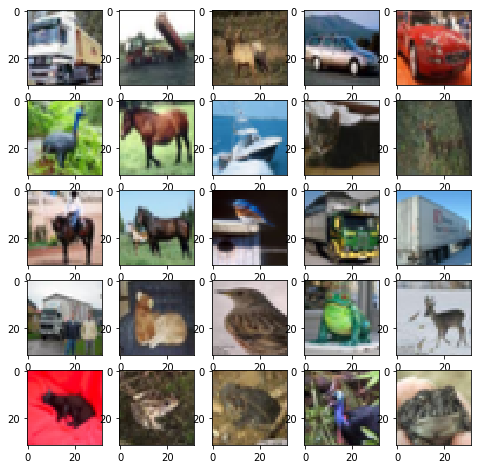

In [75]:
visualize_images(data, 5, 5, 8)

In [88]:
img = np.transpose(data.loc[1, data.columns != 'label'].astype(int).values.reshape(3, 32,32), (1,2,0))

NameError: name 'data' is not defined